## Install and Updated Required Libraries

In [4]:
### Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [6]:
### install joblib. This will be used to save your model. 
### Restart your kernel after installing 
# !pip install joblib

In [2]:
import pandas as pd
import numpy as np

## Read the CSV and Perform Basic Data Cleaning

In [15]:
df = pd.read_csv('../data/daily_summary.csv')
df = df.dropna(axis=0, how='all')
df = df.drop('index', axis=1)
print(df.shape)
df.head()

(991, 15)


,date,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral,s&p_%change,s&p_up/down
0,2016-11-08,17,4,0,5.855472,915.44,0.099388,522435,1118266,908,12,0,4,0.004526,up
1,2016-11-09,3,1,0,5.599524,156.98,-0.156560,227982,700580,163,2,0,1,0.014872,up
2,2016-11-10,1,0,0,6.650000,39.90,0.893916,36535,142625,32,1,0,0,-0.000005,down
3,2016-11-11,5,0,0,5.826134,355.76,0.070050,193625,832596,351,4,0,1,0.000805,up
4,2016-11-15,2,0,0,5.873654,146.84,0.117570,69857,254719,144,2,0,0,0.005580,up


## Select Your Features and Label (X and y values)

In [40]:
# Set features. This will also be used as your x values.
# Select the features you would like to use - this is depended on the model you're going to use.
# It might be benefitial to utilize a feature selection model.
selected_features = df.drop(['date', 's&p_up/down', 's&p_%change', 'isRetweet', 'isDeleted', 'negative', 'neutral'], axis=1)
print(selected_features.shape)
selected_features.head()

(991, 8)


,tweets,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive
0,17,5.855472,915.44,0.099388,522435,1118266,908,12
1,3,5.599524,156.98,-0.156560,227982,700580,163,2
2,1,6.650000,39.90,0.893916,36535,142625,32,1
3,5,5.826134,355.76,0.070050,193625,832596,351,4
4,2,5.873654,146.84,0.117570,69857,254719,144,2


## Create Training And Test Split

In [41]:
# Pull out the output labels column or y values
labels = df['s&p_up/down']
print(labels.shape)
labels.head()

(991,)


0      up
1      up
2    down
3      up
4      up
Name: s&p_up/down, dtype: object

In [42]:
# Use the train_test_split method to categorize your data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.7, random_state=3)

In [43]:
# Inspect training data
print(X_train.shape)
X_train.head()

(693, 8)


,tweets,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive
698,15,5.536479,1581.47,-0.219605,256903,1176890,1666,6
224,13,5.830371,814.64,0.074287,169611,651491,822,10
14,4,5.794237,255.50,0.038153,32086,184796,259,4
170,5,5.377086,316.28,-0.378998,79147,313053,342,2
358,9,5.605780,1015.79,-0.150304,199486,848005,1056,7


In [44]:
y_train.shape

(693,)

## Pre-Processing

[0.09210526 0.36572666 0.18552672 0.36572666 0.11816261 0.22600477
 0.18644068 0.06741573]


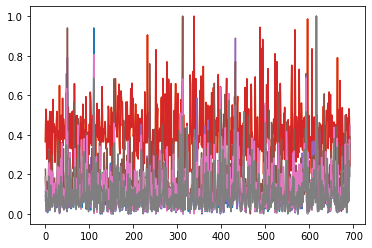

In [45]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

## Train The Model

In [60]:
# Random Forest Classifier model for training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=3, min_samples_split=8)
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.5988455988455988
Testing Data Score: 0.5234899328859061


In [56]:
# Random Forest Classifier model for training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, bootstrap= True, max_depth= 10, min_samples_split= 8)
clf = clf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8686868686868687
Testing Data Score: 0.540268456375839


## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [47]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap': [True], 'n_estimators' : [10, 50, 100, 200],
'min_samples_split' : range(8, 10, 20),'max_depth': [3, 10, 20, 40]}
grid = GridSearchCV(clf, param_grid, verbose=3)

# To get list of parameters you can tune
clf.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.554, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.532, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.532, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.507, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.558, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.540, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.576, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.558, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.558, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100, score=0.568, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100, score=0.518, total=   0.1s
[CV] bootstrap=True, max_depth=3, mi

[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=100, score=0.543, total=   0.2s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=100, score=0.486, total=   0.2s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.525, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.525, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.576, total=   0.4s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.543, total=   0.3s
[CV] bootstrap=Tru

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.3s finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, min_samples_split=8,
                                              n_estimators=10),
             param_grid={'bootstrap': [True], 'max_depth': [3, 10, 20, 40],
                         'min_samples_split': range(8, 10, 20),
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.5685329996872067


## Original Model - No Tuning Or Feature Selection
Training Data Score: 0.8614718614718615

Testing Data Score: 0.5234899328859061

## Hypertuned and Feature Selection Score

Training Data Score: 0.5858585858585859

Testing Data Score: 0.5268456375838926

## Save The Model

In [ ]:
# import joblib
# filename = 'model_2_randomforest_extratreeclassifer.h5'
# joblib.dump(clf, filename)